# Exploring tweets to determine the activeness and popularity of the top three Nigerian presidential candidates.

## by Nsikanabasi Essiet

Table of contents
- [Introduction](#intro)
- [Data Gathering](#gather)
- [Data Visualization](#viz)
- [Conclusion](#conclude)

<a id='intro'></a>
# Introduction
> The Nigerian general election is coming up next year and almost all political parties have presented their presidential candidates.
Here are the top three candidates and their respective parties:<br>
**Ahmed Bola Tinubu** - All Progressive Congress(APC)<br>
**Atiku Abubakar** - People Democratic Party(PDP)<br>
__Peter Obi__ - Labour Party(LP)<br>
The aim of this project is to check which of them is the most popular and active on Twitter. Their popularity is based on certain matrics such as their tweets `favorite_count` and `retweet_count`and their activeness is based on their tweets dates.
Pandas' tweepy library is used to query Twitter's API for the data. The data was downloaded on 19th June, 2022 (19/06/2022).
The data includes the last 500 tweets for each candidate and five specification: `tweet_date`: date of tweet, `text`: text of tweet, `screen_name`: name of candidate, `retweet_count`: count to retweets, `favorite_count`: count of tweet likes.

__Disclaimer__: This analysis is not intended for any campaign purposes, strictly educational.

<a id='gather'></a>
# Data Gathering

In [1]:
# import libraries
import tweepy
import configparser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Make an instance of the ConfigParser module and read config.ini file
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [3]:
# Get twitter api_key, api_key_secret, access_token, and access_token_secret from config.ini
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [4]:
# Tweepy authentication
auth = tweepy.OAuth1UserHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

dic = []
# List of twitter_handles of top three presidential aspirants
users = ['PeterObi', 'officialABAT', 'atiku']

limit = 500
for user in users:
#     Query API and download tweet details
    tweets = tweepy.Cursor(api.user_timeline, screen_name = user, count = 200, tweet_mode = 'extended').items(limit)
    
#     Get the needed metrics for analyses from tweets
    for tweet in tweets:
        dic.append([tweet.created_at, tweet.full_text, tweet.user.screen_name, tweet.retweet_count, tweet.favorite_count])

# List of column names
columns = ['tweet_date', 'text', 'screen_name', 'retweet_count', 'favorite_count']

# DataFrame of tweets
df = pd.DataFrame(dic, columns = columns)

In [5]:
# Explore data
df

,tweet_date,text,screen_name,retweet_count,favorite_count
0,2022-06-18 16:10:19+00:00,"RT @comradephils: Leader of the new Nigeria, @...",PeterObi,4126,0
1,2022-06-14 13:43:02+00:00,I just departed for Egypt on a 3-day visit as ...,PeterObi,25084,89415
2,2022-06-13 11:08:30+00:00,I am a Nigerian running to serve every Nigeria...,PeterObi,26099,86987
3,2022-06-12 22:47:00+00:00,At an event marking the June 12 anniversary in...,PeterObi,5509,27746
4,2022-06-12 13:18:17+00:00,I was honoured to be at the 70th birthday cele...,PeterObi,6057,32716
...,...,...,...,...,...
1495,2021-12-07 10:19:12+00:00,It was an honour and pleasure to be part of th...,atiku,58,464
1496,2021-12-06 22:12:03+00:00,Arsenal keeps me up at night. Are there any fa...,atiku,764,5970
1497,2021-12-04 18:24:19+00:00,"Earlier today, at the investiture of Asiwaju (...",atiku,62,383
1498,2021-12-04 14:02:17+00:00,I just arrived in Lagos for the investiture ce...,atiku,87,515


In [6]:
# Check DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_date      1500 non-null   datetime64[ns, UTC]
 1   text            1500 non-null   object             
 2   screen_name     1500 non-null   object             
 3   retweet_count   1500 non-null   int64              
 4   favorite_count  1500 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 58.7+ KB


<a id='viz'></a>
# Data Visualization

## Question: Which of the top three presidential aspirants is the most active on Twitter?

Answer:
> I used seaborn's FacetGrid method to plot the distribution. The instance of the FacetGrid method is used to plot a lineplot for each aspirant and here's the results:
Atiku appears to be the most active on Twitter as his last 500 tweets are from around September 2021 till date, 2022.
officialABAT is the second with his last 500 tweets between around April 2020 till date, 2022 
PeterObi is the least  active on Twitter with last 500 tweet from January 2019 till date.

<ipython-input-7-8bb9dc304d13>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=30)


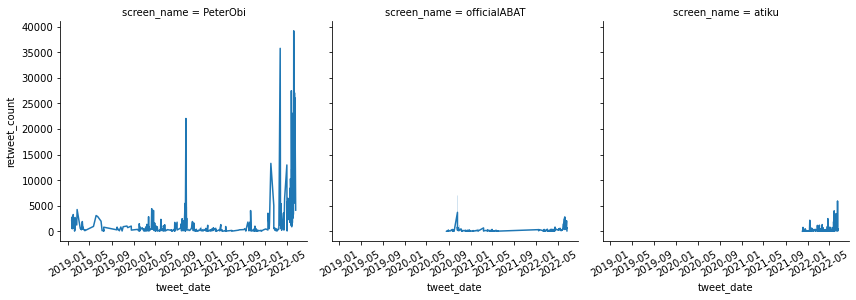

In [7]:
# Use FacetGrid to plot the distribution
def facet_grid_1():
    g = sns.FacetGrid(data = df, col = 'screen_name', height = 4)
    g.map(sns.lineplot, 'tweet_date', "retweet_count")

    # Set xtick rotation
    for ax in g.axes.flat:
        labels = ax.get_xticklabels() 

        ax.set_xticklabels(labels, rotation=30)
facet_grid_1()

## Question: Who is the most popular candidate?

Answer
> To answer this question, I used two metrics to determine their popularity: `favorite_count` and `retweet_count`. Then I used seaborn's lineplot to make two plots with `favorite_count` and `retweet_count` respectively for each aspirant's tweets. For equity, I used their 2022 tweets only and here's the results: PeterObi appears as the most popular candidate by a very large margin, distantly followed by Atiku. officialABAT is the least popular on Twitter. 

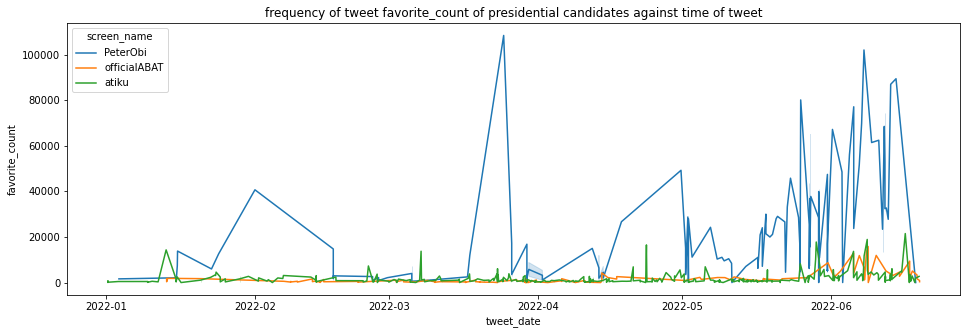

In [8]:
# Get a sub_data for 2022 tweets
tweet_2022 = df[df.tweet_date.dt.year == 2022]
def line_plot_1():

    # Line plot of favorite_count
    plt.figure(figsize=[16, 5])
    sns.lineplot(data=tweet_2022, x="tweet_date", y='favorite_count', hue="screen_name");
    plt.title('frequency of tweet favorite_count of presidential candidates against time of tweet');
line_plot_1()

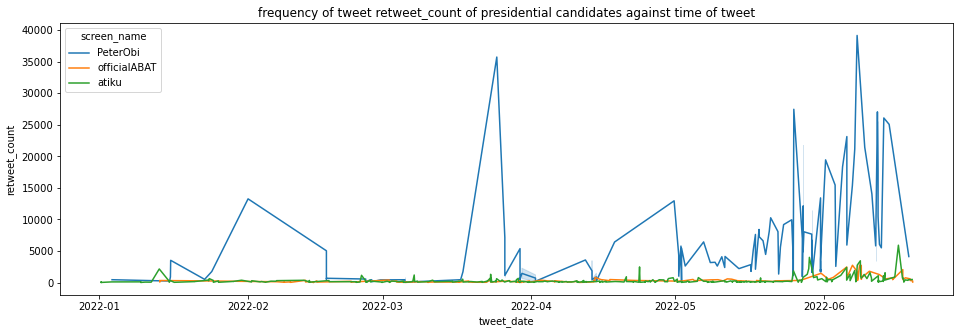

In [9]:
# Line plot of retweet_count
def line_plot_2():
    plt.figure(figsize=[16,5])
    sns.lineplot(data=tweet_2022, x="tweet_date", y='retweet_count', hue="screen_name");
    plt.title('frequency of tweet retweet_count of presidential candidates against time of tweet');
line_plot_2()

In [10]:
# Save the data
df.to_csv('tweet_data.csv', index=False)

<a id='conclude'></a>
# Conclusion
1. Atiku is the most active on Twitter, closely followed by Tinubu. Peter Obi is the least active
2. Peter Obi is the most popular, distantly followed by Atiku. Tinubu is the least.